# Wykład 5 cz. 2 - biblioteka seaborn

Seaborn jest biblioteką "wysokiego poziomu", która pozwala na tworzenie zaawansowanych wizualizacji danych, która pokrzysta "pod spodem" z interfejsu dostarczanego przez bibliotekę matplotlib. Można ją określić mianem biblioteki matplotlib "na sterydach".

## Instalacja 

Bibliotekę seaborn można zainstalować za pomocą polecenia **pip install seaborn** w konsoli, lub **!pip install seaborn** w notatniku jupyter.




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Zbiory danych

Biblioteka seaborn dostarcza przykładowe zbiory danych w formie ramek danych (obiektów klasy DataFrame), które mogą być przydatne przy przykładowych wizualizacjach. Aby wczytać przykładowy zbiór danych, należy wykorzystać funkcję load_dataset pochodzącą z biblioteki seaborn:



In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips: pd.DataFrame = sns.load_dataset('tips')  

tips.head()  

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Więcej zbiorów danych można znaleźć pod adresem https://github.com/mwaskom/seaborn-data lub używając funkcji get_dataset_names() pochodzącej z pakietu seaborn:

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Biblioteka seaborn nie dostarcza opisów zbiorów danych. W tym celu należy samodzielnie wyszukać w sieci źródła informacji o nich (np. na platformie kaggle). 

## Wykres punktowy

Pierwszym krokiem podczas tworzenia wizualizacji przy użyciu biblioteki seaborn jest ustawienie stylu wykresu za pomocą funkcji set_theme dostarczanej przez pakiet seaborn:

In [5]:
sns.set_theme(style='darkgrid')

Pozostałe dostępne style wykresów to: whitegrid, dark, white oraz ticks. Następnie (opcjonalnie) przy użyciu funkcji figure pochodzącej z biblioteki matplotlib. W następnej kolejności należy użyć funkcji relplot przekazując wartości, które znajdą się na osiach x oraz y:

<Figure size 500x500 with 0 Axes>

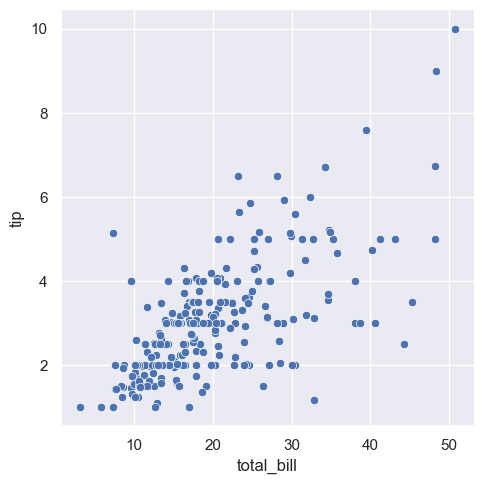

In [6]:
plt.figure(figsize=(5, 5)) 

sns.relplot(x='total_bill', y='tip', data=tips)  

plt.show()  

Na osiach x oraz y znalazły się automatycznie nadane etykiety na podstawie przekazanych kolumn. Korzystając z parametru hue można nadać punktom kolory w zależności od przynależności do jednej z wartości w wyznaczonej kolumnie kategorialnej:

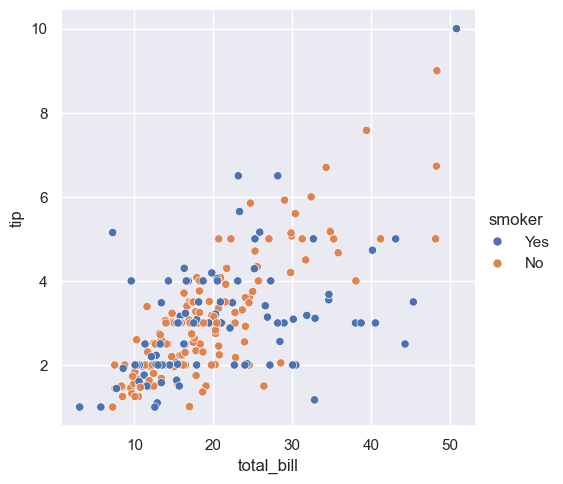

In [7]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker')  

plt.show()  

Korzystając z parametru style można dodatkowo wyznaczyć odrębne kształty punktów w zależności od wartości w wyznaczonej kolumnie:

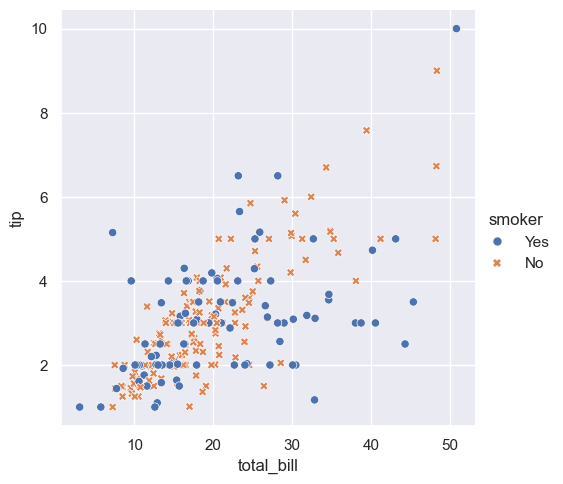

In [8]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker', style='smoker')  

plt.show()  

Punktom można nadać również rozmiar za pomocą parametru size oraz wskazanej kolumny:

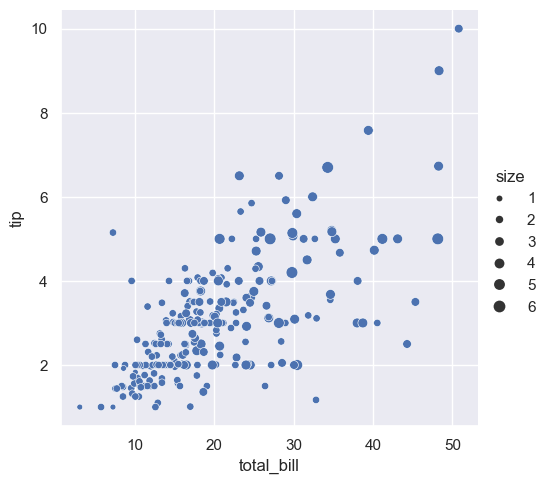

In [9]:
sns.relplot(x='total_bill', y='tip', size='size', data=tips)  

plt.show()

## Wykres liniowy

Do utworzenia wykresu liniowego również można wykorzystać funkcję relplot pochodzącą z pakietu seaborn, jednak w tym celu należy przekazać dodatkowy parametr kind o wartości line:

In [10]:
iris: pd.DataFrame = sns.load_dataset('iris') 
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


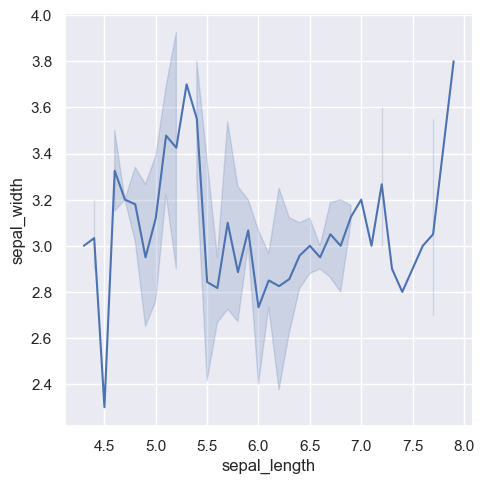

In [11]:
sns.relplot(x='sepal_length', y='sepal_width', kind='line', data=iris)  

plt.show()

Obszarem zacienionym wyznaczone są przedziały ufności przedstawianej zależności. Można je wyłączyć za pomocą parametru errorbar o wartości None:

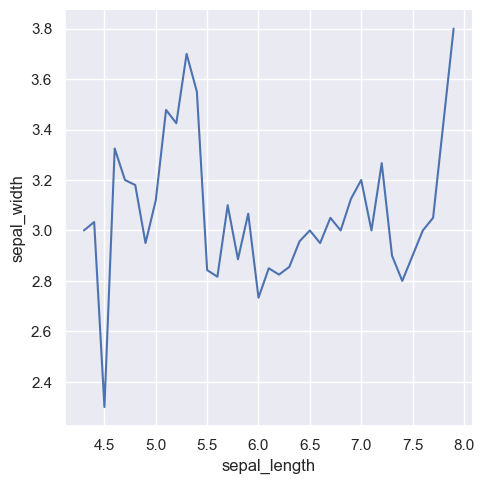

In [12]:
sns.relplot(x='sepal_length', y='sepal_width', kind='line', data=iris, errorbar=None)  

plt.show()

Przy użyciu parametrów hue oraz species można podzielić wykres na oddzielne serie w zależności od przynależności do wyznaczonej wartości wskazanej kolumny:

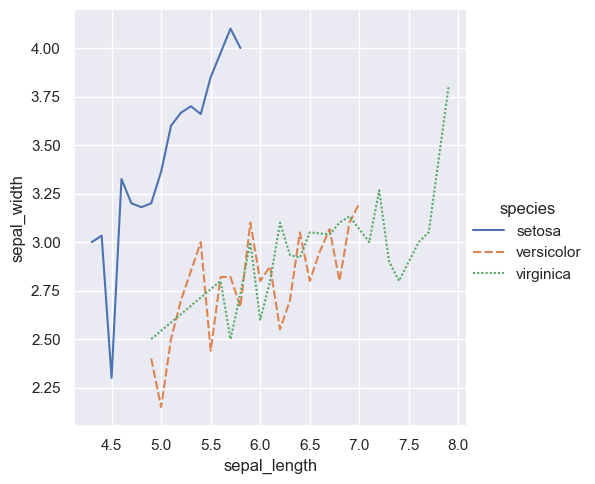

In [13]:
sns.relplot(x='sepal_length', y='sepal_width', data=iris, kind='line', errorbar=None, hue='species', style='species')  

plt.show()

Korzystając z parametru markers o wartości True można zaznaczyć na wykresie liniowym dyskretne punkty, które przyjmuje prezentowana zależność:

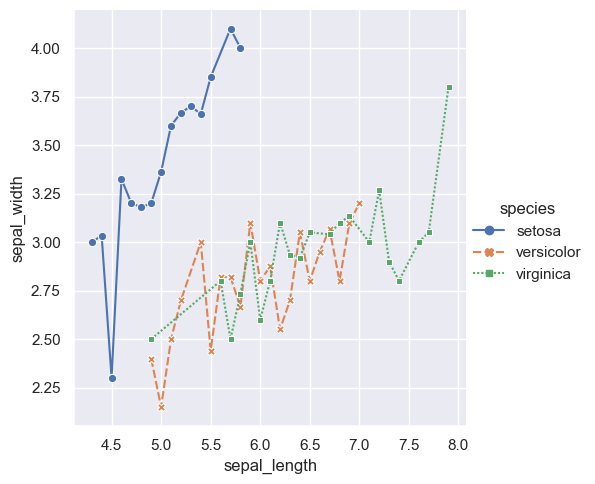

In [14]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', style='species', data=iris, kind='line', errorbar=None, markers=True)

plt.show()

Aby uniknąć punktów na przerywanej linii należy przekazać parametr dashes o wartości False:

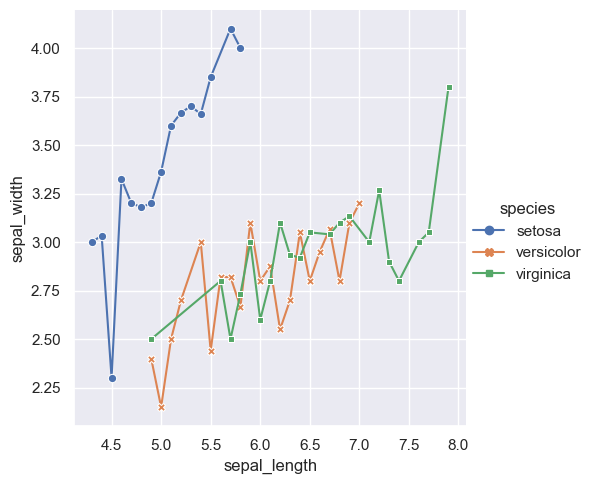

In [15]:
sns.relplot(x='sepal_length', y='sepal_width', data=iris, kind='line', errorbar=None, hue='species', style='species', dashes=False, markers=True)

plt.show()

## Wykres słupkowy

Do przedstawienia wizualizacji słupkowwej należy wykorzystać funkcję countplot pochodzącą z pakietu seaborn:

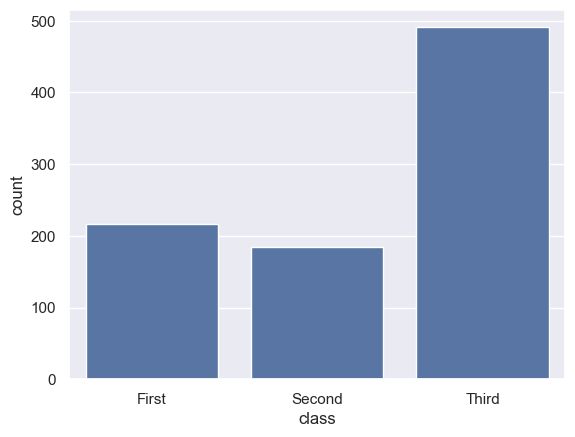

In [16]:
titanic: pd.DataFrame = sns.load_dataset('titanic')  

sns.countplot(x='class', data=titanic)  

plt.show()

Przekazując parametr hue można podzielić słupki na kategorie według wyznaczonej kolumny:

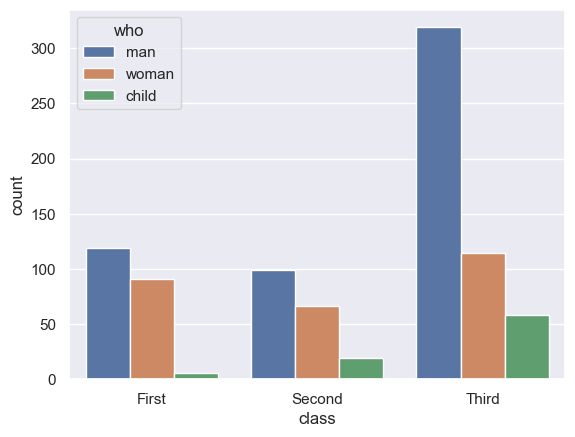

In [17]:
sns.countplot(x='class', hue='who', data=titanic)

plt.show()

## Wykresy podzielone

Przekazując wyznaczoną kolumnę do atrybutu col, można uzyskać podzielone wykresy o liczbie równej liczbie unikalnych wartości w unikalnej kolumnie. Przykład, przekazując kolumnę subject, która posiada 14 unikalnych wartości, uzyskamy wizualizację zawierającą 14 różnych wykresów, których wartości na osi x oraz y będą tożsame prezentowanej wartości z wyznaczonej kolumny.


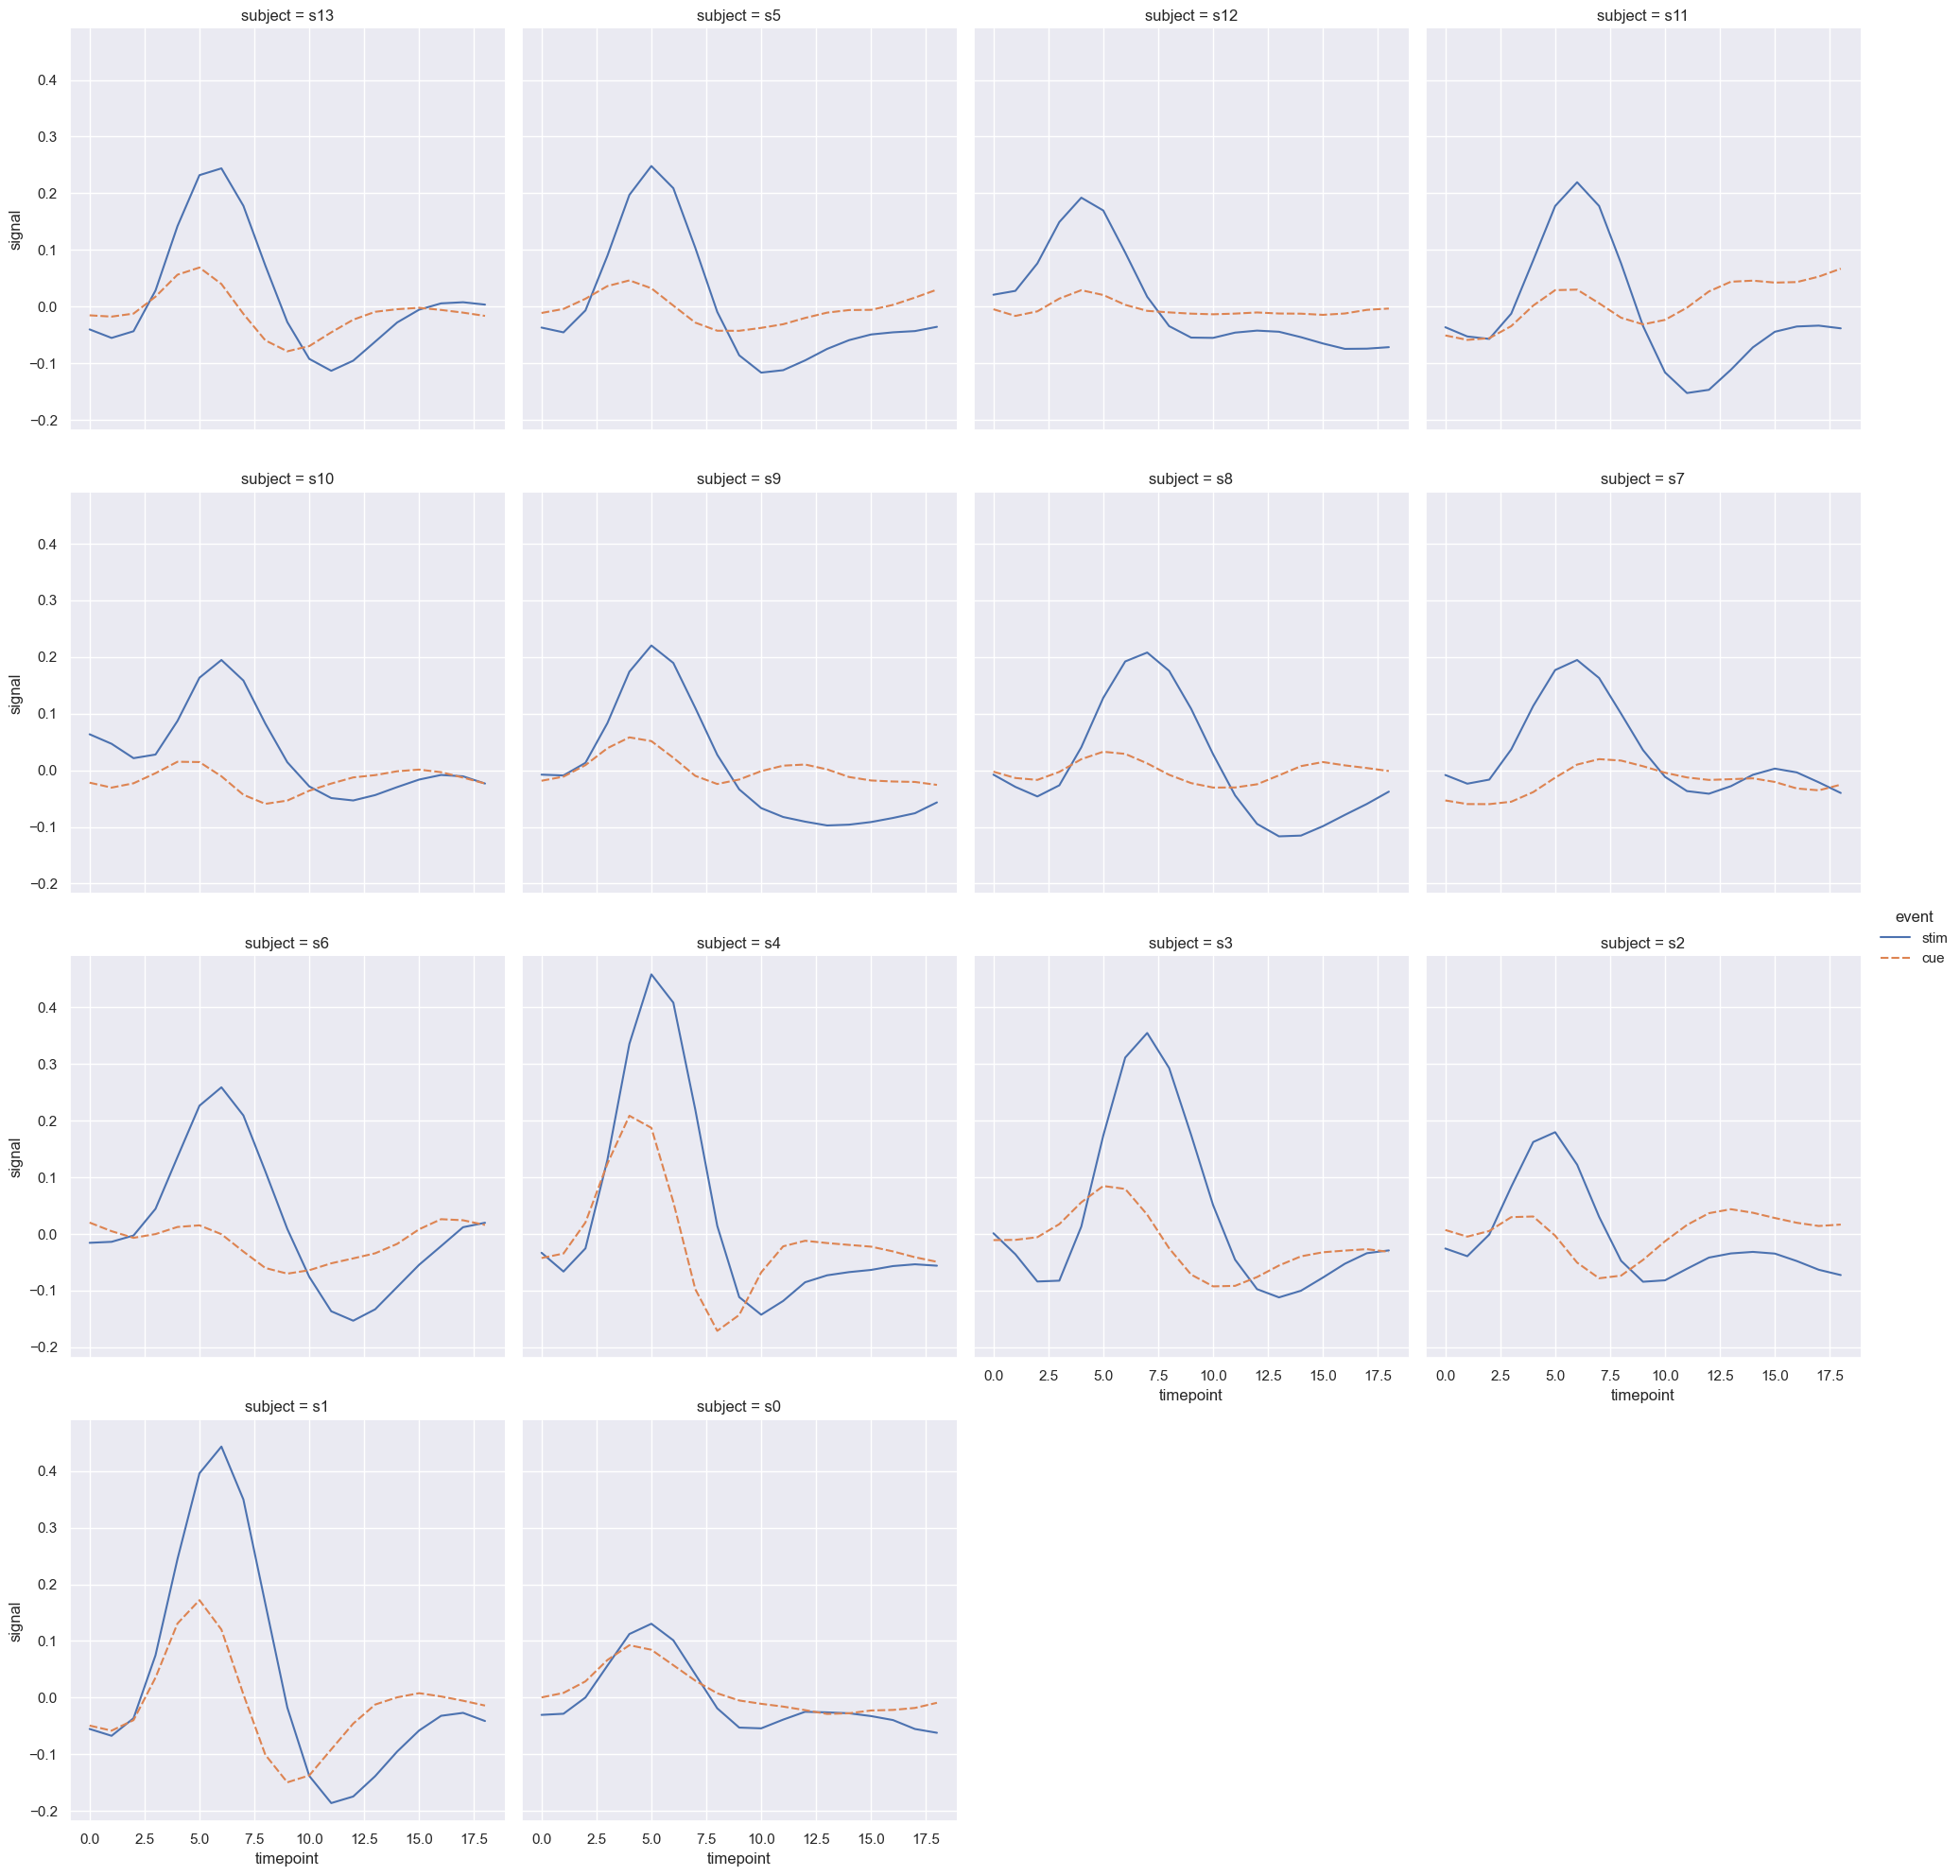

In [18]:
fmri: pd.DataFrame = sns.load_dataset('fmri')


sns.relplot(x='timepoint', y='signal', hue='event', style='event', col='subject', col_wrap=4, kind='line', data=fmri, errorbar=None)

plt.show()

In [19]:
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


## Mapy ciepła

Mapy ciepła pozwalają na wizualizację wartości znajdujących się w ramkach danych lub tablicach NumPy za pomocą barw.

In [20]:
import numpy as np  

df = pd.DataFrame(np.random.rand(10, 10), columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])  

df.head()  

,A,B,C,D,E,F,G,H,I,J
0,0.721825,0.545650,0.077477,0.231350,0.351217,0.887099,0.703718,0.953796,0.618204,0.344103
1,0.865978,0.661460,0.858751,0.306505,0.079009,0.258370,0.897883,0.343685,0.258608,0.932275
2,0.165436,0.471007,0.303820,0.407454,0.249796,0.903710,0.475453,0.900620,0.674568,0.165384
3,0.918689,0.161589,0.858278,0.329934,0.069944,0.019966,0.226352,0.723308,0.941483,0.014742
4,0.170484,0.312512,0.586772,0.224497,0.997108,0.774361,0.523771,0.084582,0.482366,0.025380


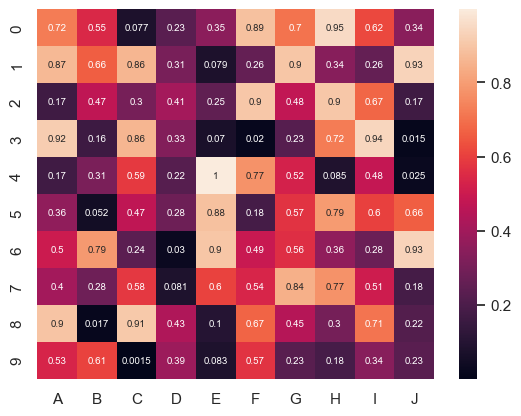

In [21]:



sns.heatmap(df, annot=True, annot_kws={'size': 7})

plt.show()

## Zadania

1. Każdej wizualizacji nadać styl dobrany metodą pseudolosową.

2. Przygotować wykres punktowy dwóch kolumn numerycznych dobranych pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić punkty kształtem i kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na osi x ani na osi y.

3. Przygotować wykres liniowy dwóch kolumn numerycznych dobranych pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić wizualizację kształtem i kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na osi x ani na osi y.

4. Przygotować wykres słupkowy kolumny dobranej pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić słupki kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na wykresie.

5. Przygotować mapę ciepła o liczbie wierszy i kolumn wyznaczonej pseudolosowo. Kolumny nazwać kolejnymi literami alfabetu.